<a href="https://colab.research.google.com/github/VPK570/GDG_Club_Selection/blob/AIML/GDG_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE



In [ ]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# **EDA**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.drop(['Time'], inplace =True, axis=1)

In [ ]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


/tmp/ipython-input-1915689511.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


,count
Class,
0,284315
1,492


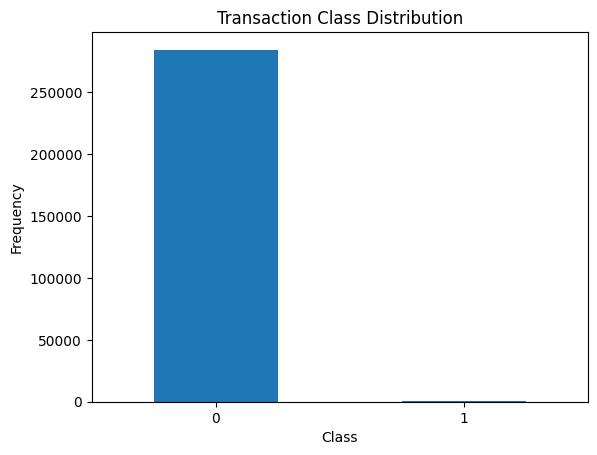

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency");

data.Class.value_counts()

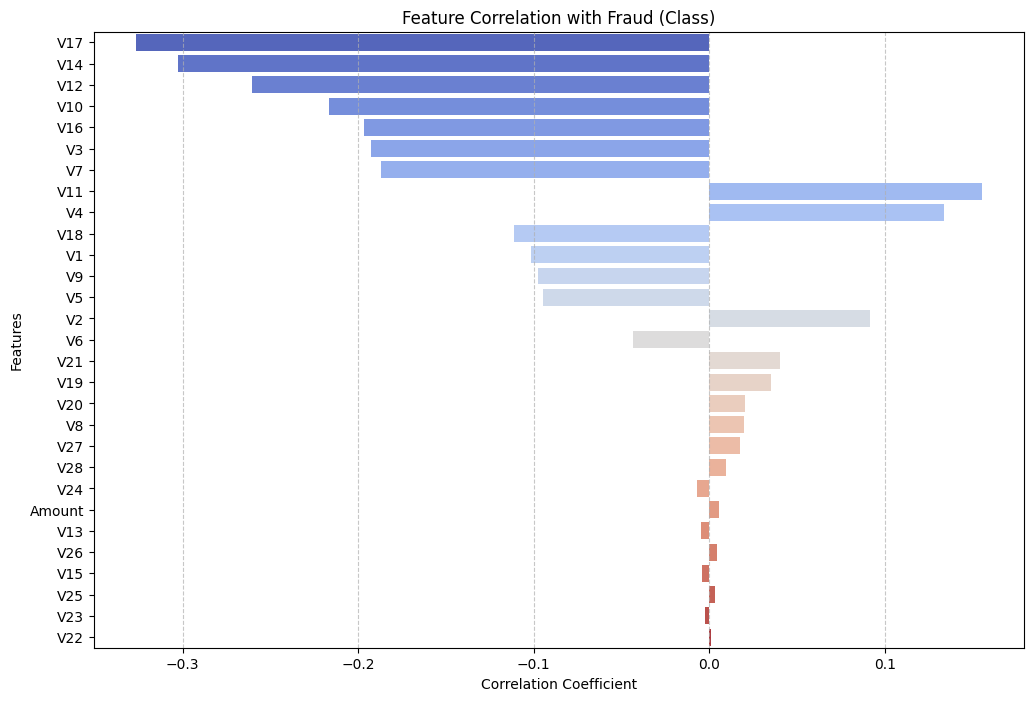

In [ ]:
correlations = data.corr()['Class'].drop('Class')
sorted_correlations = correlations.abs().sort_values(ascending=False)
features_sorted = sorted_correlations.index
actual_correlations = correlations.loc[features_sorted]

plt.figure(figsize=(12, 8))
sns.barplot(x=actual_correlations.values, y=actual_correlations.index, hue=actual_correlations.index, legend=False, palette='coolwarm')
plt.title('Feature Correlation with Fraud (Class)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Data Split & Data Balancing**



In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
def print_score(label, prediction, train=True):
    dataset = "Train" if train else "Test"
    clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
    print(f"{dataset} Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    print(f"{dataset} Classification Report:\n{clf_report}")
    print(f"{dataset} Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")


### **ANN**

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,593 (557.00 KB)

 Trainable params: 141,057 (551.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.FalseNegatives(name='fn')
    ]
)

callbacks = [
    ModelCheckpoint('fraud_model_best.h5', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

r = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    batch_size=2048,
    epochs=300,
    callbacks=callbacks
)


Epoch 1/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5282 - fn: 59.0111 - loss: 0.8177 - precision: 0.0021 - recall: 0.6084

90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.5286 - fn: 59.5604 - loss: 0.8173 - precision: 0.0021 - recall: 0.6088 - val_accuracy: 0.9934 - val_fn: 33.0000 - val_loss: 0.5884 - val_precision: 0.1577 - val_recall: 0.6024
Epoch 2/300
86/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6470 - fn: 53.9651 - loss: 0.6843 - precision: 0.0035 - recall: 0.6495

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6488 - fn: 56.4176 - loss: 0.6831 - precision: 0.0035 - recall: 0.6512 - val_accuracy: 0.9958 - val_fn: 37.0000 - val_loss: 0.5387 - val_precision: 0.2300 - val_recall: 0.5542
Epoch 3/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7716 - fn: 41.2073 - loss: 0.5957 - precision: 0.0051 - recall: 0.7197

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7741 - fn: 46.7912 - loss: 0.5938 - precision: 0.0052 - recall: 0.7156 - val_accuracy: 0.9972 - val_fn: 36.0000 - val_loss: 0.4720 - val_precision: 0.3431 - val_recall: 0.5663
Epoch 4/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - fn: 53.1548 - loss: 0.5218 - precision: 0.0088 - recall: 0.6632

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8611 - fn: 56.8462 - loss: 0.5205 - precision: 0.0089 - recall: 0.6637 - val_accuracy: 0.9983 - val_fn: 36.0000 - val_loss: 0.4195 - val_precision: 0.5402 - val_recall: 0.5663
Epoch 5/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - fn: 50.7654 - loss: 0.4545 - precision: 0.0123 - recall: 0.6314

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9186 - fn: 57.0769 - loss: 0.4526 - precision: 0.0126 - recall: 0.6324 - val_accuracy: 0.9986 - val_fn: 36.0000 - val_loss: 0.3552 - val_precision: 0.6438 - val_recall: 0.5663
Epoch 6/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9508 - fn: 44.8452 - loss: 0.3874 - precision: 0.0236 - recall: 0.7002

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9511 - fn: 49.7033 - loss: 0.3864 - precision: 0.0236 - recall: 0.6957 - val_accuracy: 0.9987 - val_fn: 36.0000 - val_loss: 0.2936 - val_precision: 0.6528 - val_recall: 0.5663
Epoch 7/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - fn: 54.9398 - loss: 0.3302 - precision: 0.0291 - recall: 0.6203

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9663 - fn: 60.6264 - loss: 0.3291 - precision: 0.0294 - recall: 0.6189 - val_accuracy: 0.9989 - val_fn: 36.0000 - val_loss: 0.2465 - val_precision: 0.7705 - val_recall: 0.5663
Epoch 8/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - fn: 59.9390 - loss: 0.2779 - precision: 0.0467 - recall: 0.5955

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9772 - fn: 66.3187 - loss: 0.2769 - precision: 0.0467 - recall: 0.5949 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.2055 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 9/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - fn: 67.0706 - loss: 0.2366 - precision: 0.0497 - recall: 0.5338

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9826 - fn: 71.7912 - loss: 0.2358 - precision: 0.0502 - recall: 0.5346 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.1681 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 10/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9869 - fn: 62.8889 - loss: 0.1946 - precision: 0.0656 - recall: 0.5497

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9869 - fn: 71.4396 - loss: 0.1939 - precision: 0.0663 - recall: 0.5478 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.1422 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 11/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - fn: 68.6706 - loss: 0.1662 - precision: 0.0922 - recall: 0.5480

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9895 - fn: 73.1978 - loss: 0.1657 - precision: 0.0925 - recall: 0.5485 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.1195 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 12/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - fn: 67.7294 - loss: 0.1383 - precision: 0.1069 - recall: 0.5451

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9923 - fn: 73.0110 - loss: 0.1379 - precision: 0.1075 - recall: 0.5433 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0987 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 13/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - fn: 69.2262 - loss: 0.1176 - precision: 0.1255 - recall: 0.5484

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9932 - fn: 75.8791 - loss: 0.1172 - precision: 0.1259 - recall: 0.5440 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0827 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 14/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9944 - fn: 66.3012 - loss: 0.1010 - precision: 0.1466 - recall: 0.5141

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9945 - fn: 73.4286 - loss: 0.1006 - precision: 0.1483 - recall: 0.5139 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0704 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 15/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - fn: 67.6951 - loss: 0.0850 - precision: 0.1935 - recall: 0.5275

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9957 - fn: 75.8681 - loss: 0.0849 - precision: 0.1928 - recall: 0.5253 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0624 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 16/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9963 - fn: 80.2706 - loss: 0.0760 - precision: 0.2557 - recall: 0.4842

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9963 - fn: 85.4615 - loss: 0.0758 - precision: 0.2535 - recall: 0.4841 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0525 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 17/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9965 - fn: 79.8537 - loss: 0.0653 - precision: 0.2787 - recall: 0.5056

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9965 - fn: 86.9341 - loss: 0.0651 - precision: 0.2747 - recall: 0.5048 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0454 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 18/300
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9969 - fn: 82.1461 - loss: 0.0586 - precision: 0.2889 - recall: 0.4784

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9969 - fn: 83.8791 - loss: 0.0586 - precision: 0.2890 - recall: 0.4785 - val_accuracy: 0.9989 - val_fn: 39.0000 - val_loss: 0.0398 - val_precision: 0.8302 - val_recall: 0.5301
Epoch 19/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - fn: 78.5181 - loss: 0.0499 - precision: 0.3098 - recall: 0.4948

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9972 - fn: 85.4615 - loss: 0.0499 - precision: 0.3100 - recall: 0.4941 - val_accuracy: 0.9989 - val_fn: 40.0000 - val_loss: 0.0352 - val_precision: 0.8269 - val_recall: 0.5181
Epoch 20/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - fn: 82.5301 - loss: 0.0458 - precision: 0.3023 - recall: 0.4538

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9972 - fn: 89.2527 - loss: 0.0457 - precision: 0.3038 - recall: 0.4557 - val_accuracy: 0.9989 - val_fn: 39.0000 - val_loss: 0.0307 - val_precision: 0.8302 - val_recall: 0.5301
Epoch 21/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9975 - fn: 79.9383 - loss: 0.0419 - precision: 0.3177 - recall: 0.4583

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9975 - fn: 88.7692 - loss: 0.0418 - precision: 0.3197 - recall: 0.4596 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0277 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 22/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - fn: 83.7529 - loss: 0.0365 - precision: 0.4231 - recall: 0.4932

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9978 - fn: 88.8242 - loss: 0.0365 - precision: 0.4195 - recall: 0.4922 - val_accuracy: 0.9989 - val_fn: 40.0000 - val_loss: 0.0250 - val_precision: 0.8431 - val_recall: 0.5181
Epoch 23/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - fn: 75.2073 - loss: 0.0346 - precision: 0.3691 - recall: 0.4511

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9979 - fn: 83.5824 - loss: 0.0345 - precision: 0.3713 - recall: 0.4529 - val_accuracy: 0.9989 - val_fn: 40.0000 - val_loss: 0.0227 - val_precision: 0.8269 - val_recall: 0.5181
Epoch 24/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - fn: 73.8471 - loss: 0.0310 - precision: 0.4332 - recall: 0.5374

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9979 - fn: 79.0110 - loss: 0.0309 - precision: 0.4309 - recall: 0.5352 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0214 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 25/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - fn: 67.2588 - loss: 0.0284 - precision: 0.4470 - recall: 0.5246

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9982 - fn: 72.2637 - loss: 0.0284 - precision: 0.4482 - recall: 0.5249 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0195 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 26/300
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - fn: 76.9213 - loss: 0.0280 - precision: 0.5059 - recall: 0.5172

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9982 - fn: 78.6593 - loss: 0.0280 - precision: 0.5050 - recall: 0.5168 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0181 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 27/300
80/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - fn: 62.5375 - loss: 0.0245 - precision: 0.4623 - recall: 0.5535

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9983 - fn: 71.8022 - loss: 0.0245 - precision: 0.4651 - recall: 0.5508 - val_accuracy: 0.9989 - val_fn: 39.0000 - val_loss: 0.0169 - val_precision: 0.8302 - val_recall: 0.5301
Epoch 28/300
79/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9984 - fn: 64.4177 - loss: 0.0236 - precision: 0.5052 - recall: 0.5297

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - fn: 74.7802 - loss: 0.0236 - precision: 0.5062 - recall: 0.5278 - val_accuracy: 0.9989 - val_fn: 39.0000 - val_loss: 0.0156 - val_precision: 0.8302 - val_recall: 0.5301
Epoch 29/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - fn: 70.3855 - loss: 0.0205 - precision: 0.5525 - recall: 0.5398

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - fn: 78.0110 - loss: 0.0205 - precision: 0.5499 - recall: 0.5346 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0145 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 30/300
80/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9984 - fn: 68.1750 - loss: 0.0198 - precision: 0.5528 - recall: 0.5278

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - fn: 76.6593 - loss: 0.0198 - precision: 0.5517 - recall: 0.5289 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0138 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 31/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9984 - fn: 72.4198 - loss: 0.0199 - precision: 0.5069 - recall: 0.4545

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - fn: 81.2308 - loss: 0.0198 - precision: 0.5135 - recall: 0.4595 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0133 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 32/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - fn: 71.6173 - loss: 0.0192 - precision: 0.5339 - recall: 0.5225

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - fn: 79.7582 - loss: 0.0191 - precision: 0.5368 - recall: 0.5219 - val_accuracy: 0.9990 - val_fn: 36.0000 - val_loss: 0.0124 - val_precision: 0.8393 - val_recall: 0.5663
Epoch 33/300
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9985 - fn: 77.4886 - loss: 0.0174 - precision: 0.5754 - recall: 0.4868

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9985 - fn: 80.2088 - loss: 0.0174 - precision: 0.5761 - recall: 0.4867 - val_accuracy: 0.9990 - val_fn: 38.0000 - val_loss: 0.0119 - val_precision: 0.8333 - val_recall: 0.5422
Epoch 34/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - fn: 67.1481 - loss: 0.0181 - precision: 0.5973 - recall: 0.5169

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9986 - fn: 75.1868 - loss: 0.0179 - precision: 0.5993 - recall: 0.5187 - val_accuracy: 0.9989 - val_fn: 39.0000 - val_loss: 0.0113 - val_precision: 0.8302 - val_recall: 0.5301
Epoch 35/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - fn: 68.9268 - loss: 0.0165 - precision: 0.6007 - recall: 0.5255

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9986 - fn: 77.1429 - loss: 0.0165 - precision: 0.6033 - recall: 0.5229 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0110 - val_precision: 0.8364 - val_recall: 0.5542
Epoch 36/300
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - fn: 68.0000 - loss: 0.0145 - precision: 0.5579 - recall: 0.5844

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9986 - fn: 70.4396 - loss: 0.0145 - precision: 0.5587 - recall: 0.5831 - val_accuracy: 0.9990 - val_fn: 37.0000 - val_loss: 0.0105 - val_precision: 0.8519 - val_recall: 0.5542
Epoch 37/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - fn: 82.5833 - loss: 0.0158 - precision: 0.5930 - recall: 0.4753

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9985 - fn: 88.4176 - loss: 0.0157 - precision: 0.5926 - recall: 0.4758 - val_accuracy: 0.9991 - val_fn: 34.0000 - val_loss: 0.0101 - val_precision: 0.8596 - val_recall: 0.5904
Epoch 38/300
80/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9987 - fn: 65.4500 - loss: 0.0133 - precision: 0.6579 - recall: 0.5227

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - fn: 74.0110 - loss: 0.0133 - precision: 0.6565 - recall: 0.5252 - val_accuracy: 0.9991 - val_fn: 33.0000 - val_loss: 0.0095 - val_precision: 0.8621 - val_recall: 0.6024
Epoch 39/300
80/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - fn: 67.4625 - loss: 0.0148 - precision: 0.5928 - recall: 0.5189

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9986 - fn: 76.3626 - loss: 0.0147 - precision: 0.5963 - recall: 0.5197 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0091 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 40/300
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - fn: 67.5000 - loss: 0.0125 - precision: 0.7301 - recall: 0.6133

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - fn: 69.6264 - loss: 0.0125 - precision: 0.7280 - recall: 0.6121 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0087 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 41/300
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - fn: 75.0795 - loss: 0.0116 - precision: 0.7522 - recall: 0.5353

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - fn: 77.6484 - loss: 0.0117 - precision: 0.7502 - recall: 0.5344 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0085 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 42/300
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - fn: 67.4205 - loss: 0.0115 - precision: 0.7101 - recall: 0.5670

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9988 - fn: 69.4835 - loss: 0.0115 - precision: 0.7098 - recall: 0.5675 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0081 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 43/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - fn: 69.5833 - loss: 0.0130 - precision: 0.6645 - recall: 0.5336

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - fn: 75.3846 - loss: 0.0129 - precision: 0.6656 - recall: 0.5332 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0079 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 44/300
79/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9987 - fn: 63.0000 - loss: 0.0121 - precision: 0.6506 - recall: 0.5191

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - fn: 71.9121 - loss: 0.0119 - precision: 0.6543 - recall: 0.5238 - val_accuracy: 0.9991 - val_fn: 33.0000 - val_loss: 0.0076 - val_precision: 0.8621 - val_recall: 0.6024
Epoch 45/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - fn: 79.2111 - loss: 0.0110 - precision: 0.7277 - recall: 0.5154

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9988 - fn: 79.9451 - loss: 0.0110 - precision: 0.7272 - recall: 0.5156 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0076 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 46/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - fn: 66.4512 - loss: 0.0097 - precision: 0.7119 - recall: 0.5567

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9988 - fn: 73.1429 - loss: 0.0097 - precision: 0.7084 - recall: 0.5564 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0073 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 47/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - fn: 72.7253 - loss: 0.0118 - precision: 0.6993 - recall: 0.5574 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0073 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 48/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - fn: 59.6829 - loss: 0.0095 - precision: 0.7328 - recall: 0.6121

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 66.8242 - loss: 0.0095 - precision: 0.7336 - recall: 0.6070 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0070 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 49/300
87/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - fn: 79.7586 - loss: 0.0103 - precision: 0.7468 - recall: 0.4849

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9988 - fn: 82.4835 - loss: 0.0103 - precision: 0.7468 - recall: 0.4875 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0069 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 50/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9989 - fn: 62.0659 - loss: 0.0094 - precision: 0.6685 - recall: 0.6194 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0069 - val_precision: 0.8644 - val_recall: 0.6145
Epoch 51/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - fn: 65.1358 - loss: 0.0095 - precision: 0.7735 - recall: 0.5539

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9989 - fn: 72.7143 - loss: 0.0095 - precision: 0.7678 - recall: 0.5543 - val_accuracy: 0.9991 - val_fn: 33.0000 - val_loss: 0.0066 - val_precision: 0.8772 - val_recall: 0.6024
Epoch 52/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - fn: 67.7143 - loss: 0.0093 - precision: 0.7382 - recall: 0.5056

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9989 - fn: 72.8571 - loss: 0.0093 - precision: 0.7392 - recall: 0.5095 - val_accuracy: 0.9991 - val_fn: 31.0000 - val_loss: 0.0064 - val_precision: 0.8667 - val_recall: 0.6265
Epoch 53/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9988 - fn: 73.4176 - loss: 0.0090 - precision: 0.7422 - recall: 0.5751 - val_accuracy: 0.9991 - val_fn: 33.0000 - val_loss: 0.0065 - val_precision: 0.8621 - val_recall: 0.6024
Epoch 54/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9990 - fn: 57.9881 - loss: 0.0085 - precision: 0.7490 - recall: 0.6022

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9990 - fn: 62.6593 - loss: 0.0085 - precision: 0.7516 - recall: 0.6028 - val_accuracy: 0.9991 - val_fn: 31.0000 - val_loss: 0.0063 - val_precision: 0.8667 - val_recall: 0.6265
Epoch 55/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9991 - fn: 57.0366 - loss: 0.0072 - precision: 0.7979 - recall: 0.6115

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9991 - fn: 64.0220 - loss: 0.0073 - precision: 0.7951 - recall: 0.6082 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0062 - val_precision: 0.8689 - val_recall: 0.6386
Epoch 56/300
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - fn: 62.8202 - loss: 0.0074 - precision: 0.7250 - recall: 0.6057

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - fn: 64.3187 - loss: 0.0074 - precision: 0.7258 - recall: 0.6051 - val_accuracy: 0.9991 - val_fn: 31.0000 - val_loss: 0.0061 - val_precision: 0.8667 - val_recall: 0.6265
Epoch 57/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - fn: 60.7381 - loss: 0.0078 - precision: 0.7822 - recall: 0.5796

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 66.2418 - loss: 0.0078 - precision: 0.7809 - recall: 0.5787 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0059 - val_precision: 0.8814 - val_recall: 0.6265
Epoch 58/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - fn: 54.7778 - loss: 0.0076 - precision: 0.7730 - recall: 0.6136

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - fn: 62.3077 - loss: 0.0077 - precision: 0.7710 - recall: 0.6110 - val_accuracy: 0.9991 - val_fn: 32.0000 - val_loss: 0.0058 - val_precision: 0.8793 - val_recall: 0.6145
Epoch 59/300
85/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - fn: 67.6471 - loss: 0.0092 - precision: 0.7135 - recall: 0.5107

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9988 - fn: 72.1978 - loss: 0.0091 - precision: 0.7166 - recall: 0.5136 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0058 - val_precision: 0.8814 - val_recall: 0.6265
Epoch 60/300
79/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - fn: 59.3544 - loss: 0.0071 - precision: 0.8114 - recall: 0.5982

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 67.8681 - loss: 0.0071 - precision: 0.8069 - recall: 0.5976 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0057 - val_precision: 0.8814 - val_recall: 0.6265
Epoch 61/300
82/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - fn: 59.0000 - loss: 0.0073 - precision: 0.7612 - recall: 0.5779

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 65.1978 - loss: 0.0073 - precision: 0.7635 - recall: 0.5799 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0056 - val_precision: 0.8833 - val_recall: 0.6386
Epoch 62/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 68.3736 - loss: 0.0071 - precision: 0.7908 - recall: 0.5704 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0059 - val_precision: 0.8814 - val_recall: 0.6265
Epoch 63/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - fn: 58.7407 - loss: 0.0080 - precision: 0.7496 - recall: 0.5671

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9989 - fn: 65.5275 - loss: 0.0080 - precision: 0.7527 - recall: 0.5713 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0055 - val_precision: 0.8852 - val_recall: 0.6506
Epoch 64/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 69.6264 - loss: 0.0070 - precision: 0.8024 - recall: 0.5906 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0055 - val_precision: 0.8966 - val_recall: 0.6265
Epoch 65/300
80/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9992 - fn: 50.9250 - loss: 0.0066 - precision: 0.8090 - recall: 0.6250

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 58.7692 - loss: 0.0067 - precision: 0.8066 - recall: 0.6237 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0055 - val_precision: 0.8814 - val_recall: 0.6265
Epoch 66/300
83/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9991 - fn: 56.2289 - loss: 0.0060 - precision: 0.8358 - recall: 0.6138

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 61.3187 - loss: 0.0061 - precision: 0.8346 - recall: 0.6146 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0052 - val_precision: 0.8983 - val_recall: 0.6386
Epoch 67/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - fn: 64.1556 - loss: 0.0083 - precision: 0.7263 - recall: 0.6208

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - fn: 64.7802 - loss: 0.0082 - precision: 0.7269 - recall: 0.6207 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0051 - val_precision: 0.8983 - val_recall: 0.6386
Epoch 68/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9992 - fn: 59.0000 - loss: 0.0065 - precision: 0.8365 - recall: 0.6330

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9992 - fn: 59.6813 - loss: 0.0065 - precision: 0.8364 - recall: 0.6327 - val_accuracy: 0.9992 - val_fn: 31.0000 - val_loss: 0.0049 - val_precision: 0.8966 - val_recall: 0.6265
Epoch 69/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 57.8352 - loss: 0.0064 - precision: 0.7491 - recall: 0.6128 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0051 - val_precision: 0.9000 - val_recall: 0.6506
Epoch 70/300
79/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9991 - fn: 54.8987 - loss: 0.0067 - precision: 0.8506 - recall: 0.6196

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 62.8022 - loss: 0.0066 - precision: 0.8476 - recall: 0.6194 - val_accuracy: 0.9993 - val_fn: 28.0000 - val_loss: 0.0049 - val_precision: 0.9016 - val_recall: 0.6627
Epoch 71/300
84/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - fn: 61.5000 - loss: 0.0068 - precision: 0.8104 - recall: 0.5974

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 65.6923 - loss: 0.0068 - precision: 0.8099 - recall: 0.5994 - val_accuracy: 0.9992 - val_fn: 28.0000 - val_loss: 0.0049 - val_precision: 0.8871 - val_recall: 0.6627
Epoch 72/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9992 - fn: 62.7033 - loss: 0.0053 - precision: 0.8427 - recall: 0.6128 - val_accuracy: 0.9993 - val_fn: 28.0000 - val_loss: 0.0050 - val_precision: 0.9016 - val_recall: 0.6627
Epoch 73/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9990 - fn: 64.1868 - loss: 0.0063 - precision: 0.8105 - recall: 0.5798 - val_accuracy: 0.9993 - val_fn: 28.0000 - val_loss: 0.0050 - val_precision: 0.9016 - val_recall: 0.6627
Epoch 74/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 62.7473 - loss: 0.0059 - precision: 0.8629 - recall: 0.6271 - val_accuracy: 0.9993 - val_fn: 27.0000 - val_loss: 0.0050 - val_precision: 0.8889 - val_recall: 0.6747
Epoch 75/300
79/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 53.3956 - loss: 0.0052 - precision: 0.7974 - recall: 0.6705 - val_accuracy: 0.9993 - val_fn: 24.0000 - val_loss: 0.0047 - val_precision: 0.8806 - val_recall: 0.7108
Epoch 76/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 52.0989 - loss: 0.0054 - precision: 0.8220 - recall: 0.6680 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0049 - val_precision: 0.8983 - val_recall: 0.6386
Epoch 77/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 60.3846 - loss: 0.0061 - precision: 0.8069 - recall: 0.6119 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0047 - val_precision: 0.8852 - val_recall: 0.6506
Epoch 78/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - fn: 63.6923 - loss: 0.0063 - precision: 0.7789 - recall: 0.6154 - val_accuracy: 0.9993 - val_fn: 27.0000 - val_loss: 0.0049 - val_precision: 0.8889 - val_recall: 0.6747
Epoch 79/300
81/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 59.1099 - loss: 0.0056 - precision: 0.8656 - recall: 0.6441 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0046 - val_precision: 0.8852 - val_recall: 0.6506
Epoch 80/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 60.6374 - loss: 0.0055 - precision: 0.7711 - recall: 0.5917 - val_accuracy: 0.9992 - val_fn: 30.0000 - val_loss: 0.0051 - val_precision: 0.8833 - val_recall: 0.6386
Epoch 81/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - fn: 54.5055 - loss: 0.0054 - precision: 0.8476 - recall: 0.6496 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0047 - val_precision: 0.8852 - val_recall: 0.6506
Epoch 82/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - fn: 60.2747 - loss: 0.0062 - precision: 0.8447 - recall: 0.6118 - val_accuracy: 0.9992 - val_fn: 29.0000 - val_loss: 0.0048 - val_precision: 0.9000 - val_recall: 0.6506
Epoch 83/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6m

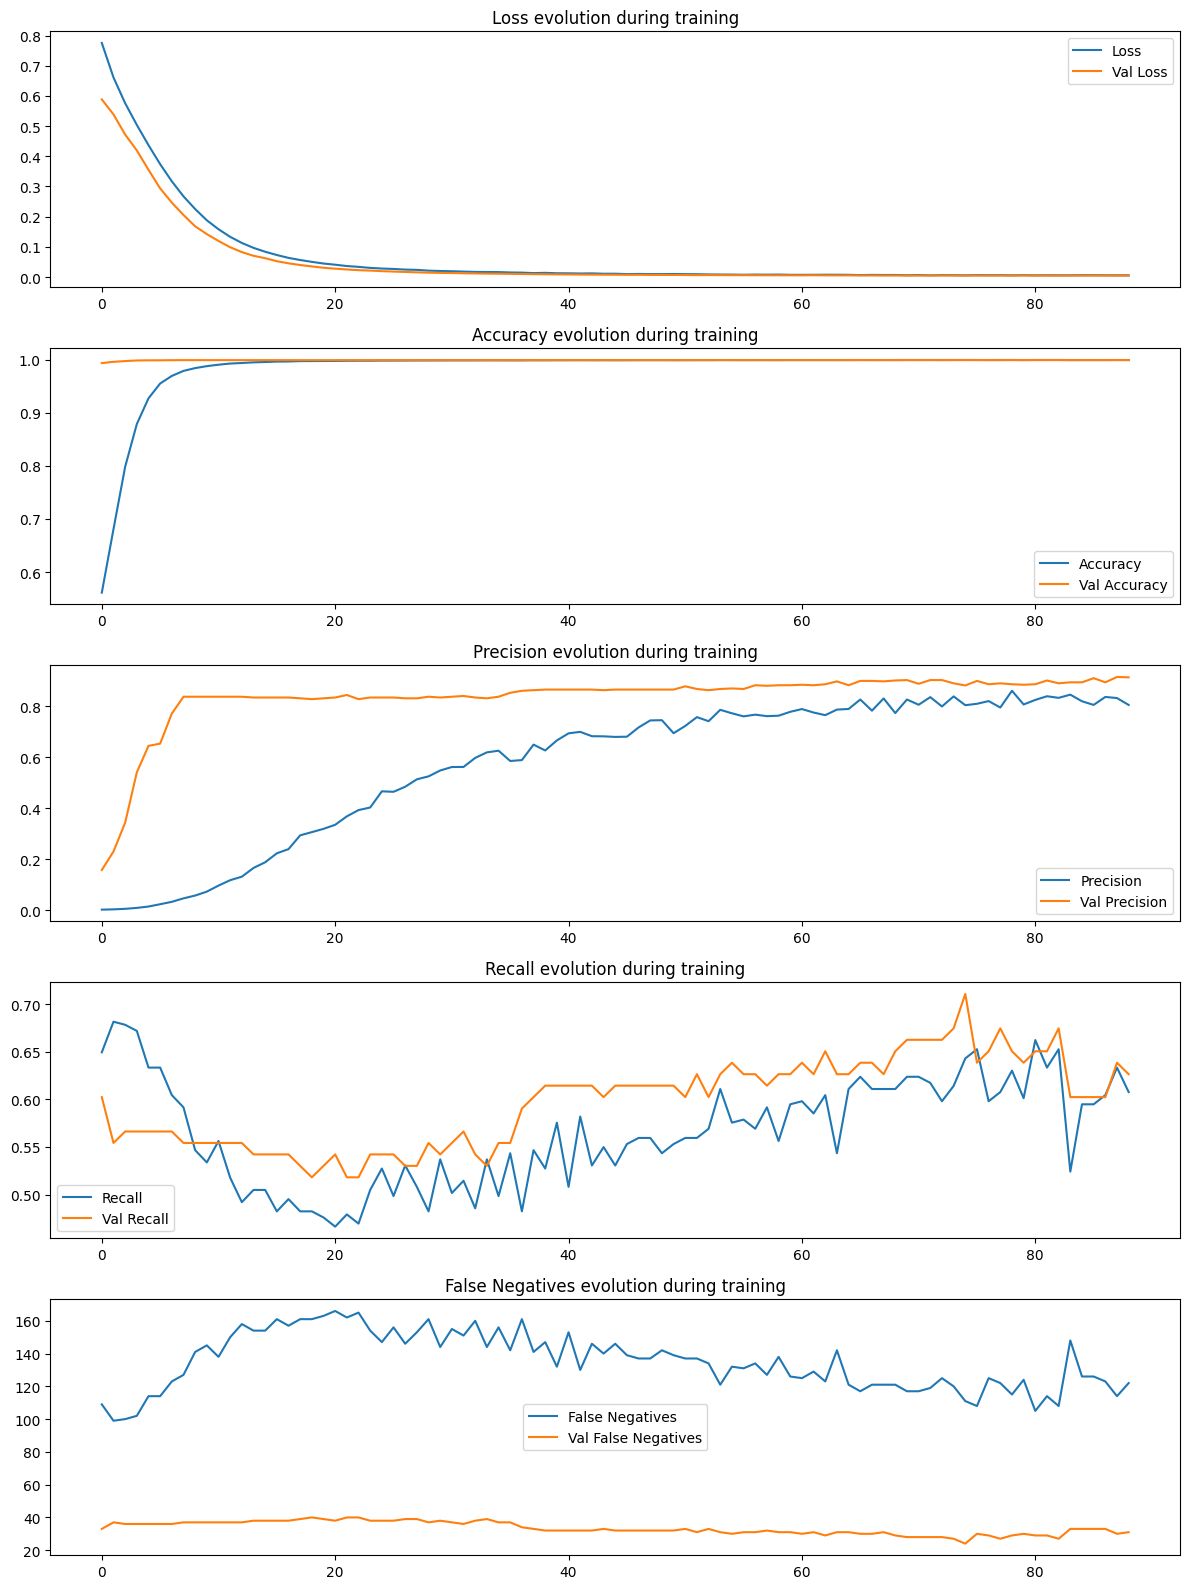

In [ ]:
plt.figure(figsize=(12, 16))

# Loss
plt.subplot(5, 1, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.title('Loss evolution during training')
plt.legend()

# Accuracy
plt.subplot(5, 1, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy evolution during training')
plt.legend()

# Precision
plt.subplot(5, 1, 3)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val Precision')
plt.title('Precision evolution during training')
plt.legend()

# Recall
plt.subplot(5, 1, 4)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val Recall')
plt.title('Recall evolution during training')
plt.legend()

# False Negatives
plt.subplot(5, 1, 5)
plt.plot(r.history['fn'], label='False Negatives')
plt.plot(r.history['val_fn'], label='Val False Negatives')
plt.title('False Negatives evolution during training')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}



7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Train Accuracy Score: 99.93%
Train Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999455    0.897010   0.99932       0.948233       0.999278
recall          0.999864    0.685279   0.99932       0.842571       0.999320
f1-score        0.999659    0.776978   0.99932       0.888319       0.999274
support    227451.000000  394.000000   0.99932  227845.000000  227845.000000
Train Confusion Matrix: 
 [[227420     31]
 [   124    270]]

Test Accuracy Score: 99.93%
Test Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999543   0.847059  0.999315      0.923301      0.999281
recall         0.999771   0.734694  0.999315      0.867233      0.999315
f1-score       0.999657   0.786885  0.999315      0.893271      0.999291
support    56864.000000  98.000000  0.999315  56962.000000  

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='aucpr')
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}



Train Accuracy Score: 100.00%
Train Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999996    1.000000  0.999996       0.999998       0.999996
recall          1.000000    0.997462  0.999996       0.998731       0.999996
f1-score        0.999998    0.998729  0.999996       0.999364       0.999996
support    227451.000000  394.000000  0.999996  227845.000000  227845.000000
Train Confusion Matrix: 
 [[227451      0]
 [     1    393]]

Test Accuracy Score: 99.95%
Test Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999648   0.876404  0.999456      0.938026      0.999436
recall         0.999807   0.795918  0.999456      0.897862      0.999456
f1-score       0.999727   0.834225  0.999456      0.916976      0.999443
support    56864.000000  98.000000  0.999456  56962.000000  56962.000000
Test Confusion Matrix: 
 [[56853    11]
 [   20    78]]

